## Kaggle Chocolate Bar Rating t-test and ANOVA
In this notebook, I am going to analyze [Kaggle-Chocolate Bar Ratings](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings). We are going to see the best producer of chocolate bar and also the origin of cocoa that make the best chocolate bar. After that, we are going to do t-test and analysis of variance to some groups of company and country to see if we can get some useful information. Although, we have limited sample data

In [1]:
## Import Packages and Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
## Read file
df = pd.read_csv("flavors_of_cacao.csv")

In [11]:
## Some data inspections
df.head()
print('Columns: ', df.columns)

"""
Apparently, i have a problem with columns name (\n). So, i need to change that a bit
But, others are good
"""
df.columns = ['Company','Specific Bean Origin','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Broad Bean Origin']
df.head()

Columns:  Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')


,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
## data inspection
print(df.shape)
print(df.info())

(1795, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   REF                   1795 non-null   int64  
 3   Review Date           1795 non-null   int64  
 4   Cocoa Percent         1795 non-null   object 
 5   Company Location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean Type             1794 non-null   object 
 8   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None


In [13]:
## data inspection
df_name = df.copy()
print('Num of rows:', len(df_name))
for el in df_name.columns:
    print(el,' ',df_name[el].unique(),'\n')
    if df_name[el].isnull().sum() > 0:
        print(f'**Missing Values**: NULL {df_name[el].isnull().sum()} | NOT NULL {df_name[el].notnull().sum()} \n')
        print('-------------------------------------- \n')
    else:
        print('-------------------------------------- \n')
        

"""
We have missing and \xa0 values in Bean Type and Broad Bean Origin column
"""

Num of rows: 1795
Company   ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 "Akesson's (Pralus)" 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA'
 'Anahata' 'Animas' 'Ara' 'Arete' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Askinosie' 'Bahen & Co.' 'Bakau'
 'Bar Au Chocolat' "Baravelli's" 'Batch' 'Beau Cacao' 'Beehive'
 'Belcolade' 'Bellflower' 'Belyzium' 'Benoit Nihant' 'Bernachon'
 'Beschle (Felchlin)' 'Bisou' 'Bittersweet Origins' 'Black Mountain'
 'Black River (A. Morin)' 'Blanxart' 'Blue Bandana' 'Bonnat'
 'Bouga Cacao (Tulicorp)' 'Bowler Man' "Brasstown aka It's Chocolate"
 'Brazen' 'Breeze Mill' 'Bright' 'Britarev' 'Bronx Grrl Chocolate'
 'Burnt Fork Bend' 'Cacao Arabuco' 'Cacao Atlanta' 'Cacao Barry'
 'Cacao de Origen' 'Cacao de Origin' 'Cacao Hunters' 'Cacao Market'
 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacaosuyo (Theobroma Inversiones)' 'Cacaoyere (Ecuatoriana)' 'Call

'\nWe have missing and \xa0 values in Bean Type and Broad Bean Origin column\n'

In [14]:
## Check how many nan and \xa0 in Bean Type and Broad Bean Origin
print('missing in Broad Bean Origin: ',(df['Broad Bean Origin']=='\xa0').sum())
print('missing in Bean Type: ',(df['Bean Type']=='\xa0').sum())
print('# of Null value in Broad Bean Origin: ', df['Broad Bean Origin'].isnull().sum())
print('# of Null value in Bean Type: ', df['Bean Type'].isnull().sum())

"""
So, half of the Broad Bean Origin is missing
But, let's not drop any column here since it will not disturb further analysis anyway
"""

df.shape

missing in Broad Bean Origin:  73
missing in Bean Type:  887
# of Null value in Broad Bean Origin:  1
# of Null value in Bean Type:  1


(1795, 9)

In [15]:
## Change Cocoa Percent and Rating data types to float

def p2f(x):
    return float(x.strip('%'))/100

df['Cocoa Percent'] = df['Cocoa Percent'].map(p2f)
df['Rating'] = df['Rating'].apply(lambda x: float(x))

df.sample(10)

,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1381,Roasting Masters,"La Dorado, light roast",1844,2016,0.70,South Korea,3.25,,Costa Rica
1066,Martin Mayer,Pisa,1836,2016,0.82,Austria,3.00,,Haiti
1045,Marana,Piura,1872,2016,0.70,Peru,3.00,,Peru
1767,Zart Pralinen,"Millot P., Ambanja",1820,2016,0.70,Austria,3.50,"Criollo, Trinitario",Madagascar
1739,Willie's Cacao,Los Llanos,1848,2016,0.70,U.K.,4.00,,Colombia
1144,Molucca,Indonesia,1618,2015,0.70,U.S.A.,2.75,,Indonesia
770,Guittard,Semisweet,99,2006,0.61,U.S.A.,3.00,Blend,
219,Blue Bandana,Guatemala,911,2012,0.70,U.S.A.,3.50,,Guatemala
1715,Videri,Mindo,1227,2014,0.75,U.S.A.,3.50,,Ecuador
1269,Parliament,Oko Caribe,1255,2014,0.70,U.S.A.,3.50,,Dominican Republic


Correlation coefficient:  -0.16482017762424425
p-value:  2.1215999288704344e-12


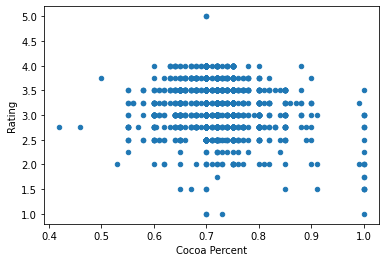

In [19]:
## Check the correlation between cocoa percentage and rating

cocoa_percent = df['Cocoa Percent']
rating = df['Rating']
corr_test = stats.pearsonr(cocoa_percent,rating)
print('Correlation coefficient: ', corr_test[0])
print('p-value: ', corr_test[1])

df.plot(x='Cocoa Percent', y='Rating', kind='scatter')
plt.show()

> **Based on the value of correlation coefficient, there is no significant correlation between cocoa percentage and rating. Futher investigation may be necessary, such as conditioning on bean type, company, or company location**

In [20]:
## Where are the best cocoa grown?
df[df['Rating'] == max(df['Rating'])]

,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
78,Amedei,Chuao,111,2007,0.7,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.7,Italy,5.0,Blend,


> **The highest rated bar is from cocoa Chuao (Venezuela) and also Toscano Black choco bar from the same company (Amedei). Italy (Amedei's location) produces the highest rated choco bar**

In [22]:
## I am rather curious with >= 4 rated choco bar country origin
df_high_rated = df[df['Rating'] >= 4]
df_high_rated['Company Location'].value_counts()

U.S.A.         25
France         23
Canada         10
Italy           9
Belgium         6
Switzerland     6
U.K.            4
Australia       4
Spain           3
Ecuador         3
Brazil          1
Guatemala       1
Germany         1
Madagascar      1
Scotland        1
Colombia        1
Sao Tome        1
Name: Company Location, dtype: int64

> **Apparently, we have top five high-rated choco country producer: USA, France, Canada, Italy, Belgium, and Switzerland**

In [23]:
## What about the choco bar maker company?
df_high_rated['Company'].value_counts()

Soma                                    10
Bonnat                                   8
Amedei                                   6
Valrhona                                 5
Idilio (Felchlin)                        4
Fresco                                   4
Pierre Marcolini                         4
A. Morin                                 3
Pralus                                   3
Michel Cluizel                           3
Arete                                    3
Pacari                                   3
Cacao Sampaka                            3
Patric                                   3
Domori                                   3
Amano                                    2
Matale                                   2
Scharffen Berger                         2
Smooth Chocolator, The                   2
Benoit Nihant                            2
Ritual                                   1
Rogue                                    1
Madecasse (Cinagra)                      1
Ocelot     

> **We also have top company with high rated choco bar here: Soma, Bonnat, Amedei, Valrhona, Idilio (Felchlin), Fresco, and Pierre Marcolini**

In [28]:
## Let's do the Anova Test between each company in USA
## Some of the test here might not be that powerful since we have limited number of sample
## i'll only take company with more than 15 samples

df_usa = df[df['Company Location'] == 'U.S.A.']
a = pd.pivot_table(df_usa, index=['Company'], values=['Rating'], aggfunc='count')
a = a.sort_values(by='Rating', ascending=False)
a = a[a['Rating'] > 15]

list_company = [el for el in a.index]
print('Company in USA: ', list_company)

Company in USA:  ['Fresco', 'Arete', 'Guittard', 'Mast Brothers', 'Scharffen Berger', 'Rogue', 'Dandelion']


In [38]:
## Let us assume all the ANOVA Assumptions are satisfied (Normality, Homogenity, and Independent Observation)
fresco = df[df['Company'] == 'Fresco']['Rating']
arete = df[df['Company'] == 'Arete']['Rating']
guittard = df[df['Company'] == 'Guittard']['Rating']
mast_brothers = df[df['Company'] == 'Mast Brothers']['Rating']
scharffen_berger = df[df['Company'] == 'Scharffen Berger']['Rating']
rogue = df[df['Company'] == 'Rogue']['Rating']
dandelion = df[df['Company'] == 'Dandelion']['Rating']

print(stats.f_oneway(fresco, arete, guittard, mast_brothers, scharffen_berger, rogue, dandelion))

F_onewayResult(statistic=2.5310851757802175, pvalue=0.023779771592504214)


> **We reject the null hypothesis. There is/are difference/s between companies. It means that there might be a/some significant/s choco rating between each company, but we don't know which is which. Need a follow up (post-hoc) test!**

In [32]:
## Let's do the t-test between two companies in Italy that have >= 10 product

df_italy = df[df['Company Location'] == 'Italy']
a = pd.pivot_table(df_italy, index=['Company'], values=['Rating'], aggfunc='count')
a = a.sort_values(by='Rating', ascending=False)
a = a[a['Rating'] >= 10]

print('Company in Italy: ', [el for el in a.index])

Company in Italy:  ['Domori', 'Amedei']


In [37]:
## We will assume equal variance (which is true, using ratio=2 treshold)

domori = df[df['Company'] == 'Domori']['Rating']
amedei = df[df['Company'] == 'Amedei']['Rating']
print('Average of Domori choco bar rating: ', domori.mean())
print('Average of Amedei choco bar rating: ', amedei.mean())

print(stats.ttest_ind(domori,amedei,equal_var=True))

Average of Domori choco bar rating:  3.477272727272727
Average of Amedei choco bar rating:  3.8461538461538463
Ttest_indResult(statistic=-2.2804199222830337, pvalue=0.029172912904242013)


> **We reject the null hypothesis, there is a significant difference between chocolate produced by domori and amedei. Amedei has a statistically higher average choco bar rating than Domori**

In [39]:
## Let's do the t-test between italy and belgium
rating_italy = df[df['Company Location'] == 'Italy']['Rating']
rating_belgium = df[df['Company Location'] == 'Belgium']['Rating']

print(stats.ttest_ind(rating_italy,rating_belgium,equal_var=True))

Ttest_indResult(statistic=1.6570619095243082, pvalue=0.10061024146839598)


> **We fail to reject the null hypothesis. Even though the chocolate might differ from one company to another company. if we are looking for the average choco bar only, we will have same choco bar rating experience in italy and belgium**

## Conclusion
Based on the dataset
- The best choco bar is from Italy!
- The best cocoa bean if come from Chuao (Venezuela) and also Toscano Black choco bar from the same company (Amedei)
- There is no significant correlation between percentage of cocoa used in the choco and the rating of the choco bar
- There is an indication of differences between choco bar maker companies across the USA based on their choco bar rating. But, we need further test and investigation
- The choco bar rating is statistically different from one company to another in Italy
- Statistically speaking, choco bar rating in Italy and Belgium is no different